In [1]:
from classy import Class
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [16]:
omega_b = 0.02266+0.00043*np.random.randn(100) #0.00015*np.random.randn(100)+0.02237
omega_cdm = 0.1157+0.0023*np.random.randn(100) #0.0012*np.random.randn(100)+0.1200
A_s = (2.427+0.008*np.random.randn(100))*1e-9 #np.exp(3.043+0.014*np.random.randn(100))*1e-10
n_s = 0.971+0.010*np.random.randn(100) #0.0042*np.random.randn(100)+0.9649
tau_reio = 0.088+0.013*np.random.randn(100) #0.0074*np.random.randn(100)+0.0540
h_pla = 0.67556
h_sho = 0.73
h_wmap = 0.693
cl_pla = np.zeros((100,2499))
cl_sho = np.zeros((100,2499))

In [17]:

for i in range(100):
    # create instance of the class "Class"
    LambdaCDM = Class()
    # pass input parameters
    LambdaCDM.set({'omega_b':omega_b[i],'omega_cdm':omega_cdm[i],
                   'h':h_wmap,'A_s':A_s[i],'n_s':n_s[i],'tau_reio':tau_reio[i]})
    LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # run class
    LambdaCDM.compute()
    ShoesCDM = Class()
    # pass input parameters
    ShoesCDM.set({'omega_b':omega_b[i],'omega_cdm':omega_cdm[i],
                   'h':h_sho,'A_s':A_s[i],'n_s':n_s[i],'tau_reio':tau_reio[i]})
    ShoesCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    ShoesCDM.compute()
    cls = LambdaCDM.lensed_cl(2500)
    clshoes=ShoesCDM.lensed_cl(2500)
    cl_pla[i]= cls['tt'][2:]
    cl_sho[i] = clshoes['tt'][2:]
    # optional: clear content of LambdaCDM (to reuse it for another model)
    LambdaCDM.struct_cleanup()
    LambdaCDM.empty()
    ShoesCDM.struct_cleanup()
    ShoesCDM.empty()

(2499,)


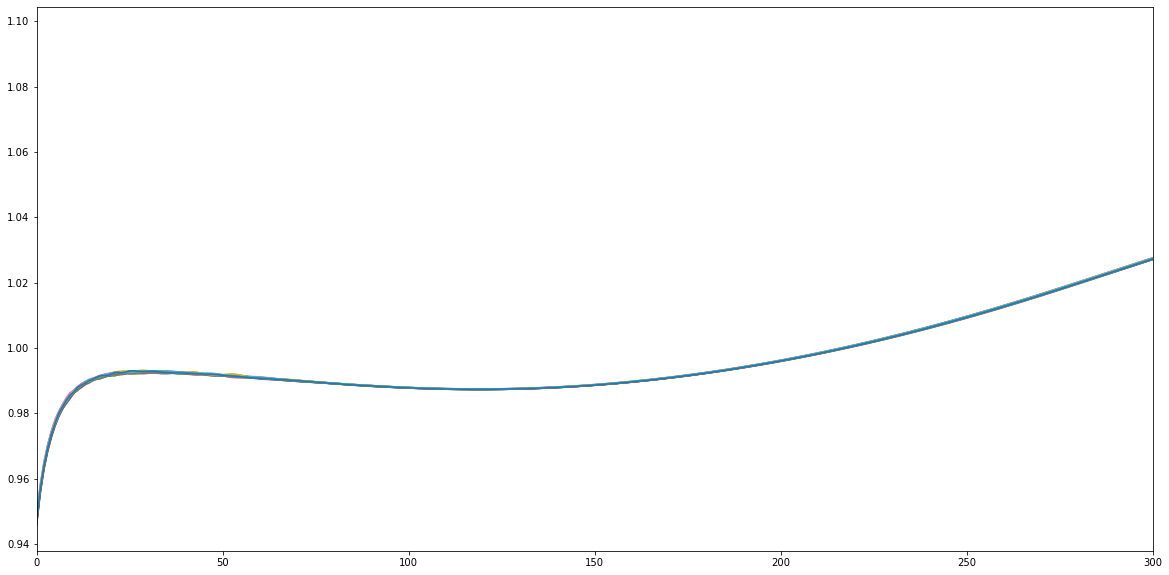

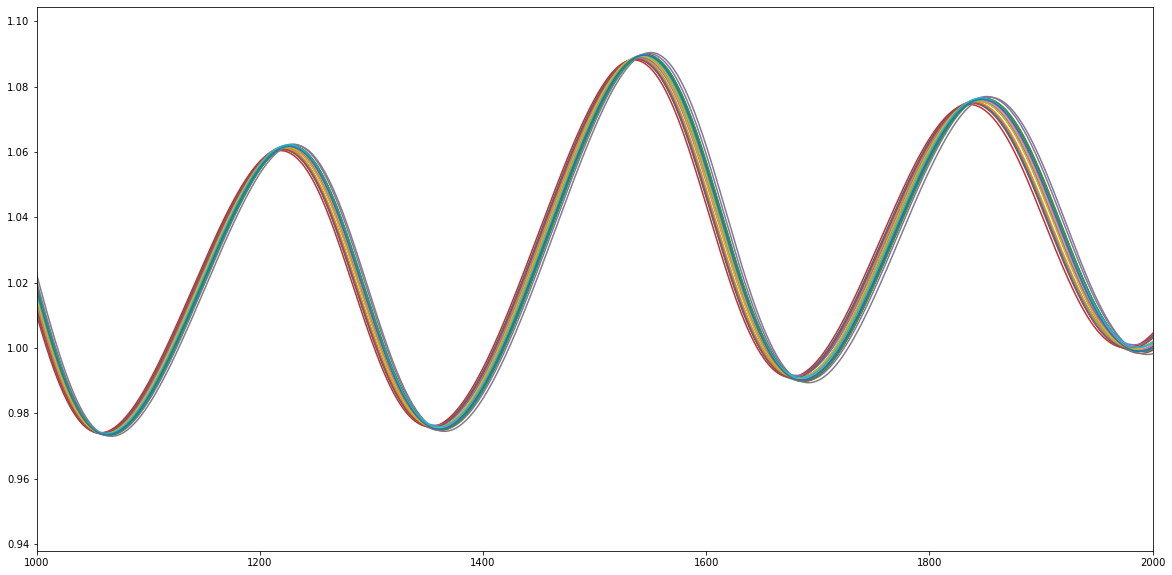

In [20]:
print(np.shape(np.mean(cl_pla, axis=0)))
ratio = cl_pla / cl_sho
mratio = np.mean(ratio, axis=0)
sration = np.std(ratio, axis=0)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(mratio)
plt.xlim([0, 300])

for i in range(20):
    plt.plot(ratio[i, :])
    
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(mratio)
plt.xlim([1000, 2000])

for i in range(20):
    plt.plot(ratio[i, :])    

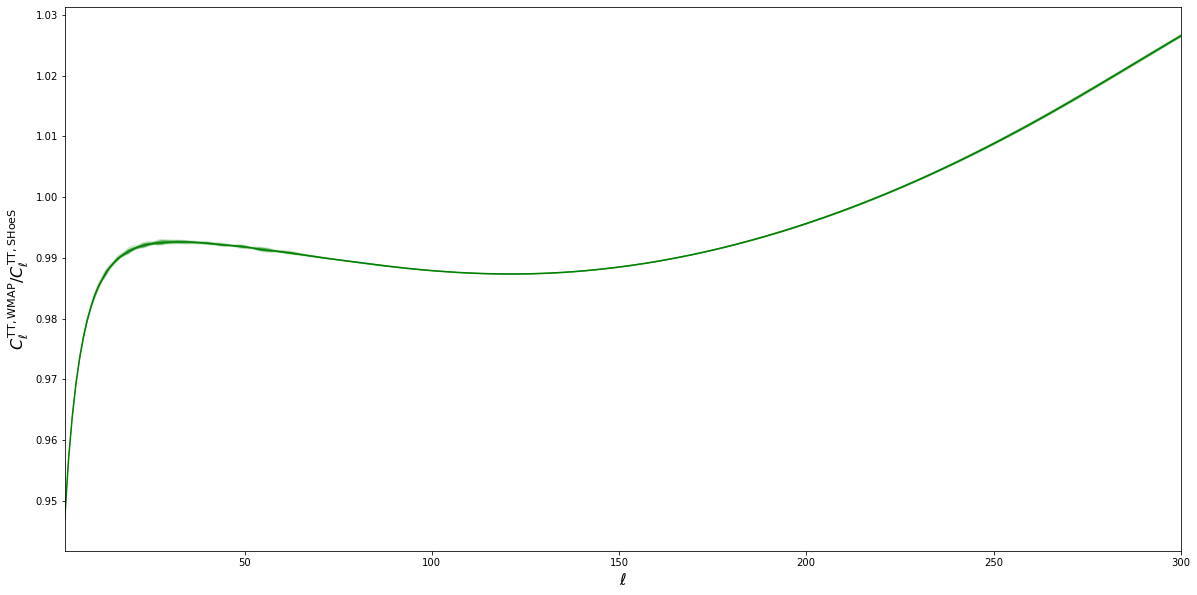

In [18]:
ll = np.arange(2,302)
ratio_sort = np.sort(cl_pla/cl_sho, axis=0)
pla_sort = np.sort(cl_pla, axis=0)
sho_sort = np.sort(cl_sho, axis=0)
fig, ax = plt.subplots(figsize=(20,10))
plt.xscale('linear');plt.yscale('linear');plt.xlim(2,300)
plt.xlabel(r'$\ell$', fontsize=16)
plt.ylabel(r'$ C_\ell^\mathrm{TT, WMAP}/C_\ell^\mathrm{TT,SHoeS}$', fontsize=16)
#ax.plot(ll,(pla_sort[49,:300]/sho_sort[49,:300]),'b--')
#ax.fill_between(ll,pla_sort[15,:300]/sho_sort[15,:300], pla_sort[83,:300]/sho_sort[83,:300], facecolor='blue', alpha=0.5)
#ax.fill_between(ll,pla_sort[4,:300]/sho_sort[4,:300], pla_sort[96,:300]/sho_sort[96,:300], facecolor='blue', alpha=0.2)
ax.plot(ll, ratio_sort[49,:300], 'g-')
ax.fill_between(ll, ratio_sort[15,:300], ratio_sort[83,:300], facecolor='green', alpha=0.6)
ax.fill_between(ll, ratio_sort[4,:300], ratio_sort[96,:300], facecolor='green', alpha=0.2)
plt.savefig('h0bo.png')

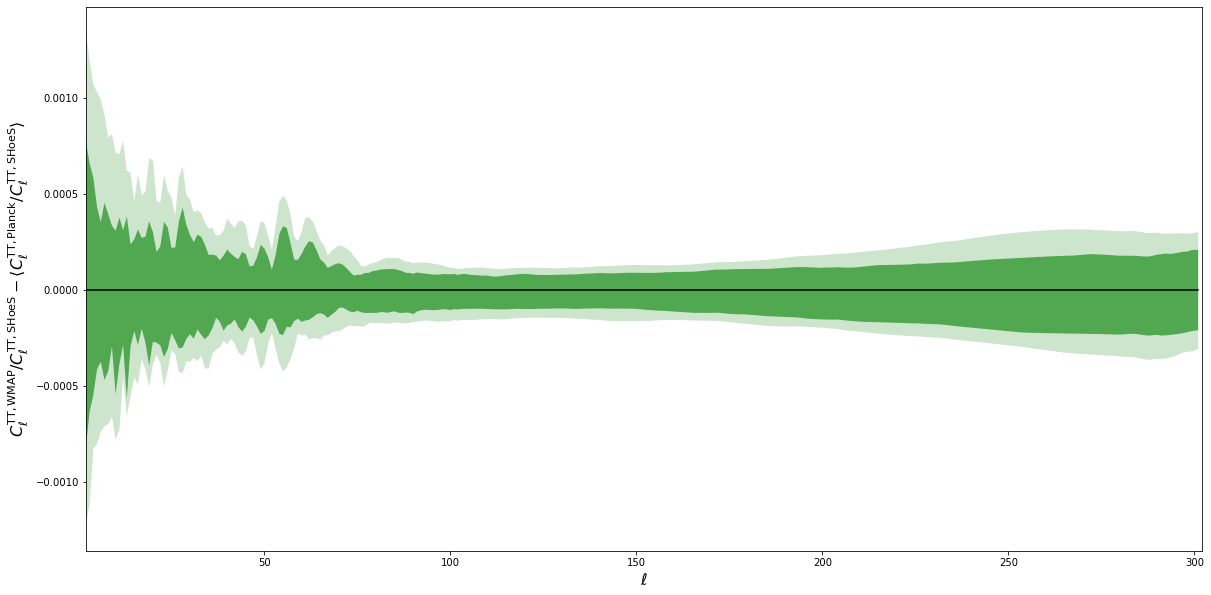

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xscale('linear');plt.yscale('linear');plt.xlim(2,302)
plt.xlabel(r'$\ell$', fontsize=16)
plt.ylabel(r'$ C_\ell^\mathrm{TT, WMAP}/C_\ell^\mathrm{TT,SHoeS}-\langle C_\ell^\mathrm{TT, Planck}/C_\ell^\mathrm{TT,SHoeS}\rangle$', fontsize=16)
ax.plot(ll,np.zeros(ll.size),'k')
ax.fill_between(ll, ratio_sort[15,:300]-ratio_sort[49,:300], ratio_sort[83,:300]-ratio_sort[49,:300], 
                facecolor='green', alpha=0.6)
ax.fill_between(ll, ratio_sort[4,:300]-ratio_sort[49,:300], ratio_sort[96,:300]-ratio_sort[49,:300], 
                facecolor='green', alpha=0.2)
#ax.fill_between(ll,pla_sort[15]/sho_sort[15]-pla_sort[49]/sho_sort[49], 
#                pla_sort[83]/sho_sort[83]-pla_sort[49]/sho_sort[49], facecolor='blue', alpha=0.5)
#ax.fill_between(ll,pla_sort[4]/sho_sort[4]-pla_sort[49]/sho_sort[49]
#                , pla_sort[96]/sho_sort[96]-pla_sort[49]/sho_sort[49], facecolor='blue', alpha=0.2)
plt.savefig('h0bgoblin.png')